# Multiple regression

$$ y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 $$

In [2]:
import numpy as np
import pandas as pd
from scipy import signal, stats
import matplotlib.pyplot as plt

In [3]:
# RMM index
f = 'data/RMM_clean.csv'
df = pd.read_csv(f, index_col=0, parse_dates=True)

# select period
df = df['1980-01-01':'1999-12-31']
df = df.loc[((df.index.month <= 4) | (df.index.month >= 11))] 

n = df.shape[0]
print(f'Number of samples = {n}')

# Z500
f = 'data/MERRA2.H.500.anom.point.csv'
h500 = pd.read_csv(f, index_col=0, parse_dates=True)
h500 = h500.loc[df.index]

# x and y
x = df[['RMM1', 'RMM2']].values
y = h500['H'].values

print(f'{x.shape = :}')
print(f'{y.shape = :}')

Number of samples = 3625
x.shape = (3625, 2)
y.shape = (3625,)


$$y = Ap = \begin{bmatrix} x_1 & x_2 & 1 \end{bmatrix} \begin{bmatrix} \beta_1 \\ \beta_2 \\ \beta_0 \end{bmatrix} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 $$

In [8]:
A = np.hstack([x, np.ones((n, 1))])
print(f'{A.shape = :}')
print(A[:5])

A.shape = (3625, 3)
[[ 0.81158602 -0.0664676   1.        ]
 [ 0.70508802 -0.0296843   1.        ]
 [ 0.66273302  0.0371988   1.        ]
 [ 0.61483997  0.21363001  1.        ]
 [ 0.70287699  0.490769    1.        ]]


In [9]:
p, res, rnk, s = np.linalg.lstsq(A, y, rcond=None)

print(f'p = {p}')
print(f'Sums of squared residuals = {res}')
print(f'Rank of matrix A (number of linearly independent columns): {rnk}')
print(f'Singular values of A: {s}')

p = [ 11.06543568 -19.66071532 -12.24433374]
Sums of squared residuals = [61035901.50265467]
Rank of matrix A (number of linearly independent columns): 3
Singular values of A: [67.71598801 61.62431145 60.19286619]


In [12]:
# Reconstruction
y_recon = A @ p

# Residual
y_res = y - y_recon

# sum of squared residuals
print(f'Sums of squared residuals = {(y_res**2).sum()}')

Sums of squared residuals = 61035901.502654575


In [13]:
print(f'y = {p[0]:.2f} RMM1 {+p[1]:.2f} RMM2 {+p[2]:.2f}')

y = 11.07 RMM1 -19.66 RMM2 -12.24


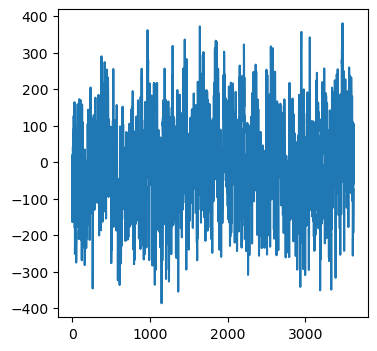

In [14]:
fig, ax = plt.subplots(figsize=(4,4))
ax.plot(y_res)

# Hypothesis tests

## Test for significance of regression (ANOVA)

$H_0$: $ \beta_1 = \beta_2 = 0 $

In [31]:
# total sum of squares
SST = np.sum((y - y.mean())**2)

# regression sum of squares
SSR = np.sum((yreg - y.mean())**2)

# sum of squared erros
SSE = np.sum((y - yreg)**2)

# coefficient of determination
R2 = SSR / SST

print(f'{SST = :.2g}, {SSR = :.2g}, {SSE = :.2g}')
print(f'{R2 = :.2g}')

SST = 6.3e+07, SSR = 2.3e+06, SSE = 6.1e+07
R2 = 0.037


In [26]:
# degree of freedom
dfn = 2
dfd = n - 3
#dfd = n_eff - 3

MSR = SSR / dfn
MSE = SSE / dfd

F = MSR / MSE
print(f'{F = :.2f}')

F = 69.19


In [27]:
# one-side test
alpha = 0.05
f_alpha = stats.f.ppf(1-alpha, dfn, dfd)
p = 1 - stats.f.cdf(F, dfn, dfd)

print(f'{f_alpha = :.3g}, {p = :.3g}')

f_alpha = 3, p = 1.11e-16


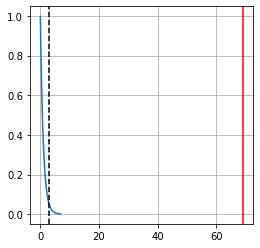

In [28]:
xx = np.linspace(stats.f.ppf(0.001, dfn, dfd), 
                 stats.f.ppf(0.999, dfn, dfd), 100)

fig, ax = plt.subplots(figsize=(4,4))
ax.plot(xx, stats.f.pdf(xx, dfn, dfd))
ax.grid()
ax.axvline(F, c='r')
ax.axvline(f_alpha, c='k', ls='--')